### Stock Market Prediction And Forecasting Using Stacked LSTM

In [55]:
### Keras and Tensorflow >2.0

In [56]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

df = pdr.get_data_yahoo("LICI.NS")

[*********************100%***********************]  1 of 1 completed


In [57]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-17,872.000000,918.950012,860.000000,875.250000,865.802429,48792877
2022-05-18,885.549988,891.000000,874.099976,876.349976,866.890564,8919761
2022-05-19,867.000000,867.000000,838.000000,840.849976,831.773743,7372427
2022-05-20,848.549988,856.799988,825.000000,826.150024,817.232422,7078291
2022-05-23,826.150024,852.700012,803.650024,816.849976,808.032776,12444648


In [58]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-26,909.099976,918.000000,892.200012,897.450012,897.450012,3883441
2024-03-27,900.950012,913.000000,888.950012,892.500000,892.500000,7788410
2024-03-28,902.650024,928.000000,901.750000,916.150024,916.150024,4191452
2024-04-01,925.000000,984.450012,924.000000,970.599976,970.599976,4863536
2024-04-02,972.650024,1001.799988,961.299988,998.400024,998.400024,5915915


In [59]:
df1=df.reset_index()['Close']

In [60]:
df1

0      875.250000
1      876.349976
2      840.849976
3      826.150024
4      816.849976
          ...    
460    897.450012
461    892.500000
462    916.150024
463    970.599976
464    998.400024
Name: Close, Length: 465, dtype: float64

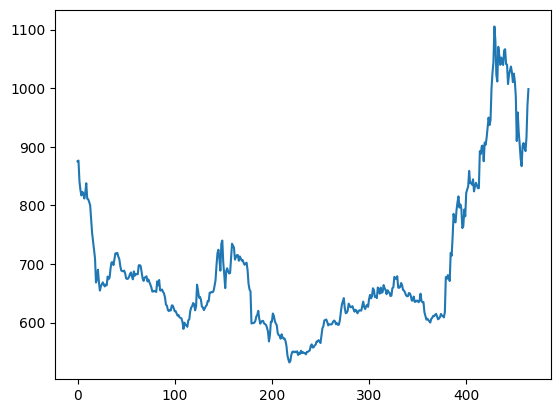

In [61]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [62]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [63]:
import numpy as np

In [64]:
df1

0      875.250000
1      876.349976
2      840.849976
3      826.150024
4      816.849976
          ...    
460    897.450012
461    892.500000
462    916.150024
463    970.599976
464    998.400024
Name: Close, Length: 465, dtype: float64

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [66]:
df1

array([[0.59888387],
       [0.60080221],
       [0.5388908 ],
       [0.51325434],
       [0.49703521],
       [0.5079351 ],
       [0.50305197],
       [0.48796658],
       [0.50531913],
       [0.5334845 ],
       [0.48735612],
       [0.4857866 ],
       [0.47758986],
       [0.46808513],
       [0.42814787],
       [0.38568192],
       [0.35960935],
       [0.33109527],
       [0.31016747],
       [0.23787935],
       [0.24843043],
       [0.27607262],
       [0.23979769],
       [0.21398676],
       [0.22593311],
       [0.23256022],
       [0.2384897 ],
       [0.23247304],
       [0.2263691 ],
       [0.23186259],
       [0.22933379],
       [0.25575518],
       [0.2477329 ],
       [0.25252885],
       [0.27982212],
       [0.29787241],
       [0.29839559],
       [0.28985003],
       [0.30737704],
       [0.32499133],
       [0.32394488],
       [0.32612486],
       [0.31470179],
       [0.30807467],
       [0.28714687],
       [0.27380536],
       [0.27179984],
       [0.271

In [67]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [68]:
training_size,test_size

(302, 163)

In [69]:
train_data

array([[0.59888387],
       [0.60080221],
       [0.5388908 ],
       [0.51325434],
       [0.49703521],
       [0.5079351 ],
       [0.50305197],
       [0.48796658],
       [0.50531913],
       [0.5334845 ],
       [0.48735612],
       [0.4857866 ],
       [0.47758986],
       [0.46808513],
       [0.42814787],
       [0.38568192],
       [0.35960935],
       [0.33109527],
       [0.31016747],
       [0.23787935],
       [0.24843043],
       [0.27607262],
       [0.23979769],
       [0.21398676],
       [0.22593311],
       [0.23256022],
       [0.2384897 ],
       [0.23247304],
       [0.2263691 ],
       [0.23186259],
       [0.22933379],
       [0.25575518],
       [0.2477329 ],
       [0.25252885],
       [0.27982212],
       [0.29787241],
       [0.29839559],
       [0.28985003],
       [0.30737704],
       [0.32499133],
       [0.32394488],
       [0.32612486],
       [0.31470179],
       [0.30807467],
       [0.28714687],
       [0.27380536],
       [0.27179984],
       [0.271

In [70]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [71]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [72]:
print(X_train.shape), print(y_train.shape)

(296, 5)
(296,)


(None, None)

In [73]:
print(X_test.shape), print(ytest.shape)

(157, 5)
(157,)


(None, None)

In [74]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [75]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [76]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_4 (LSTM)               (None, 5, 50)             20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_4 (LSTM)               (None, 5, 50)             20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


5/5 [==============================] - 8s 300ms/step - loss: 0.0348 - val_loss: 0.1612
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0131 - val_loss: 0.0686
Epoch 3/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0080 - val_loss: 0.0370
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0075 - val_loss: 0.0594
Epoch 5/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0053 - val_loss: 0.0727
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0055 - val_loss: 0.0565
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0039 - val_loss: 0.0285
Epoch 8/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0032 - val_loss: 0.0140
Epoch 9/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0023 - val_loss: 0.0133
Epoch 10/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0016 - val_loss: 0.0056
Epoch 11/100
5/5 [============

In [80]:
import tensorflow as tf

In [81]:
tf.__version__

'2.12.0-rc1'

In [82]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5/5 [==============================] - 0s 5ms/step


In [83]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [84]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

643.4133548056744

In [85]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

759.1745450611662

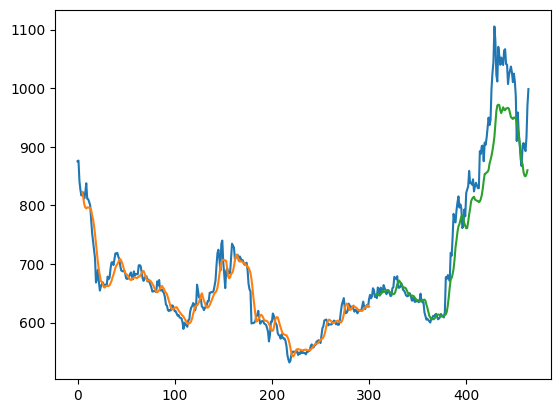

In [86]:
### Plotting 
# shift train predictions for plotting
look_back=5
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [87]:
len(test_data)

163

In [105]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
x_input.shape


(1, 5)

In [106]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [107]:
temp_input

[0.6376003157563304,
 0.6289675777091188,
 0.6702128225767479,
 0.7651726217632155,
 0.8136554394201085]

In [108]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=5
i=0
while(i<30):
    
    if(len(temp_input)>5):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6003187]
6
1 day input [0.62896758 0.67021282 0.76517262 0.81365544 0.60031867]
1 day output [[0.61389804]]
2 day input [0.67021282 0.76517262 0.81365544 0.60031867 0.61389804]
2 day output [[0.61992556]]
3 day input [0.76517262 0.81365544 0.60031867 0.61389804 0.61992556]
3 day output [[0.61188054]]
4 day input [0.81365544 0.60031867 0.61389804 0.61992556 0.61188054]
4 day output [[0.5837029]]
5 day input [0.60031867 0.61389804 0.61992556 0.61188054 0.58370292]
5 day output [[0.5445808]]
6 day input [0.61389804 0.61992556 0.61188054 0.58370292 0.54458082]
6 day output [[0.54022497]]
7 day input [0.61992556 0.61188054 0.58370292 0.54458082 0.54022497]
7 day output [[0.5290805]]
8 day input [0.61188054 0.58370292 0.54458082 0.54022497 0.52908051]
8 day output [[0.5135133]]
9 day input [0.58370292 0.54458082 0.54022497 0.52908051 0.51351333]
9 day output [[0.49673665]]
10 day input [0.54458082 0.54022497 0.52908051 0.51351333 0.49673665]
10 day output [[0.48266461]]
11 day input [0.54

In [109]:
day_new=np.arange(1,6)
day_pred=np.arange(6,36)

In [110]:
import matplotlib.pyplot as plt

In [111]:
len(df1)

465

In [95]:
465-5

460

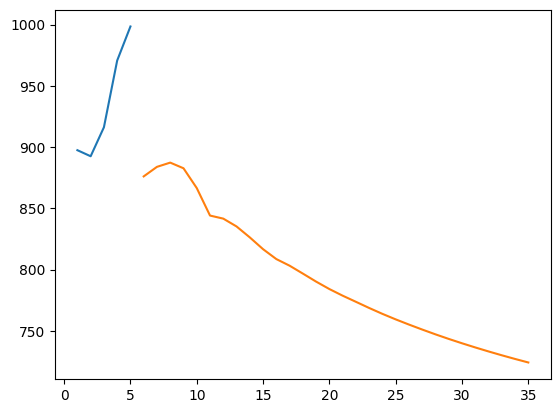

In [116]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-time_step:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

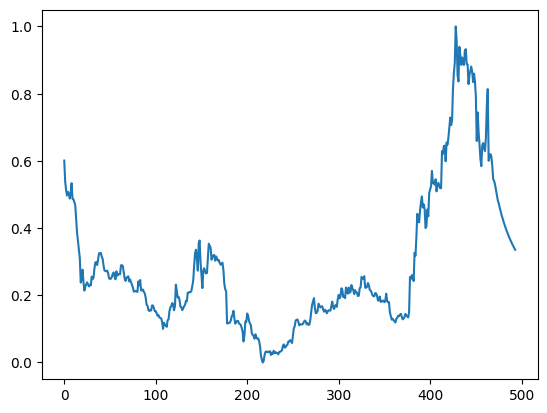

In [113]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1:])

In [114]:
df3=scaler.inverse_transform(df3).tolist()

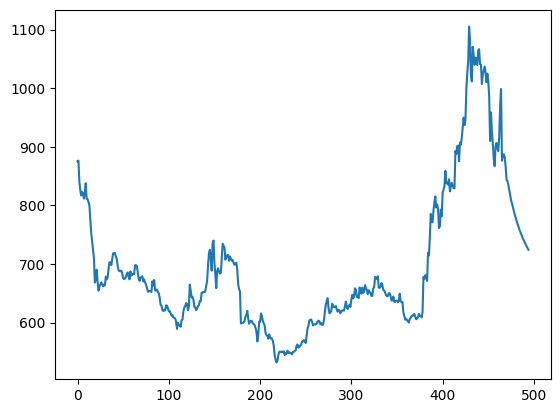

In [115]:
plt.plot(df3)